In [1]:
# Imports
import os
import sys
# ML Libraries
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.functional as F
# Protein Analysis Libaries
import MDAnalysis as mda
import nglview as nv
from nglview.datafiles import PDB, XTC
# Custom Libraries
from mol_processors.PDB_processor import download_pdb, get_coords, pdb_to_intcoords, visualize_protein
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Define some constants
PDB_DIR = "./data/pdbs/"
OCTREE_DIR = "./Octree"
# Define some parameters
pdb_id = "1cq0" # The pdb id of the input protein
dcd_file = ""
pdb_file = "data/1cq0_pnon.pdb"
psf_file = "data/1cq0.psf"
# Set flags
download_protein = True # Flag to download protein

In [3]:
# Grab internal coordinates
intern = pdb_to_intcoords(psf_file, pdb_file)
print(intern.bat)


/home/conradli/anaconda3/envs/assemble/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:2261: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(sorted(unique_bonds)), 4)


[[-1.09390001e+01  1.16120005e+01  2.80999988e-01 -1.12764013e+00
   7.71626890e-01  4.74186425e-02  1.22074199e+00  1.53155947e+00
   2.05915713e+00  1.49333908e+00  1.52941078e+00  9.79539216e-01
   1.30961679e+00  1.52949158e+00  1.53293136e+00  1.80994647e+00
   1.52954535e+00  1.48869304e+00  1.80946675e+00  1.52853722e+00
   1.42117755e+00  9.77803991e-01  1.30926736e+00  9.59700320e-01
   1.53264147e+00  1.48729171e+00  1.52970698e+00  9.76012286e-01
   1.29578581e+00  1.52940701e+00  1.52062325e+00  1.52924930e+00
   1.53106133e+00  1.52958752e+00  1.48932826e+00  1.53107189e+00
   1.53005989e+00  9.88391725e-01  1.32101035e+00  1.53054776e+00
   1.52903795e+00  1.21542324e+00  1.47558306e+00  9.79711195e-01
   1.29810068e+00  1.51442563e+00  1.48571766e+00  1.52852348e+00
   9.76767120e-01  1.29557542e+00  1.51937645e+00  1.48438475e+00
   1.52828888e+00  9.73514169e-01  1.29719636e+00  1.52330472e+00
   1.48837350e+00  1.52840997e+00  9.74778298e-01  1.29307015e+00
   1.50425

/home/conradli/anaconda3/envs/assemble/lib/python3.8/site-packages/MDAnalysis/coordinates/base.py:865: UserWarning: Reader has no dt information, set to 1.0 ps
  warnings.warn("Reader has no dt information, set to 1.0 ps")


In [5]:
visualize_protein(psf_file, pdb_file)

NGLWidget()

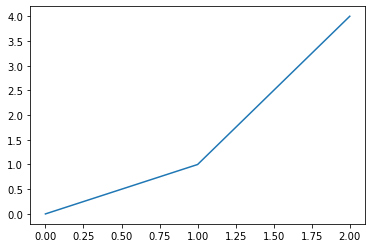

In [6]:
plt.plot([0, 1, 2], [0, 1, 4])